### Contenido.

El conjunto de características incluye:

* Cement: Cemento

* Blast Furnace Slag: Escoria de horno

* Fly Ash: Cenizas volantes

* Water: Agua

* Super-plasticizer: Superplastificante

* Coarse Aggregate: Árido grueso

* Fine Aggregate: Agregado fino

* Age: Edad

* Strength of the Cement: Resistencia del cemento


In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. 
df=pd.read_csv("concrete_data-1.csv")

In [3]:
# Visualización de las primeras filas del dataset
print("Visualización de las primeras filas del dataset:")
print(df.head())

Visualización de las primeras filas del dataset:
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  


In [4]:
# Descripción general del dataset
print("\nDescripción general del dataset:")
print(df.info())
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())



Descripción general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None

Estadísticas descriptivas del dataset:
            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364   

- Todas las columnas son numéricas así que no hay necesidad de cambiar el tipo de datos de las columnas del dataset.
- Hay 1030 filas y 9 columnas.
- La Variable de Salida = es "Strength", que representa la resistencia a la compresión del concreto. Esta es una variable cuantitativa que indica la cantidad de fuerza que el concreto puede soportar antes de fallar bajo comprensión.
- Las Variables de Entrada = son todas cuantitativas; cemento, escoria de alto horno, ceniza volante, agua, superplastificante, arido grueso, arido fino, edad. Variables que representan los ingredientes usados en la mezcla del concreto, así como la edad del concreto.
- La Resistencia a la comprension del concreto (variable de salida) es una funcion no lineal tanto de la edad del concreto como de los ingredientes utilizados en la mezcla. Esto sugiere que la relacion entre las variables de entrada (ingredientes y edad) y la variable de salida (resistencia) no es lineal, lo que puede requerir tecnicas de modelado no lineales para una prediccion precisa.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Cement:

Está menos sesgado en comparación con otras variables y parece tener una distribución parcialmente normal, lo que implica que comparte algunas características con una distribución normal pero puede tener cierta asimetría o desviación.

Slag y Ash:

Están muy sesgadas hacia la derecha, ya que la media es significativamente mayor que la mediana. Esto sugiere una distribución altamente sesgada con una concentración de valores en la parte inferior del rango y algunos valores muy altos que aumentan la media.
Age:

También está sesgada hacia la derecha, como lo indican la diferencia entre la media y la mediana, así como la presencia de valores atípicos. Esto sugiere una concentración de valores más bajos y algunos valores muy altos que afectan la media.

Strength:

Tiene una distribución casi normal, ya que la media y la mediana son similares y no hay evidencia clara de sesgo o presencia de valores atípicos.

Water y Fine Aggregate:

Están menos sesgadas pero hacia el lado izquierdo, lo que se indica cuando la mediana es mayor que la media. Esto sugiere que hay una concentración de valores más altos en el rango superior, lo que tira la mediana hacia la derecha.

In [6]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64



Análisis de la distribución de las variables numéricas:


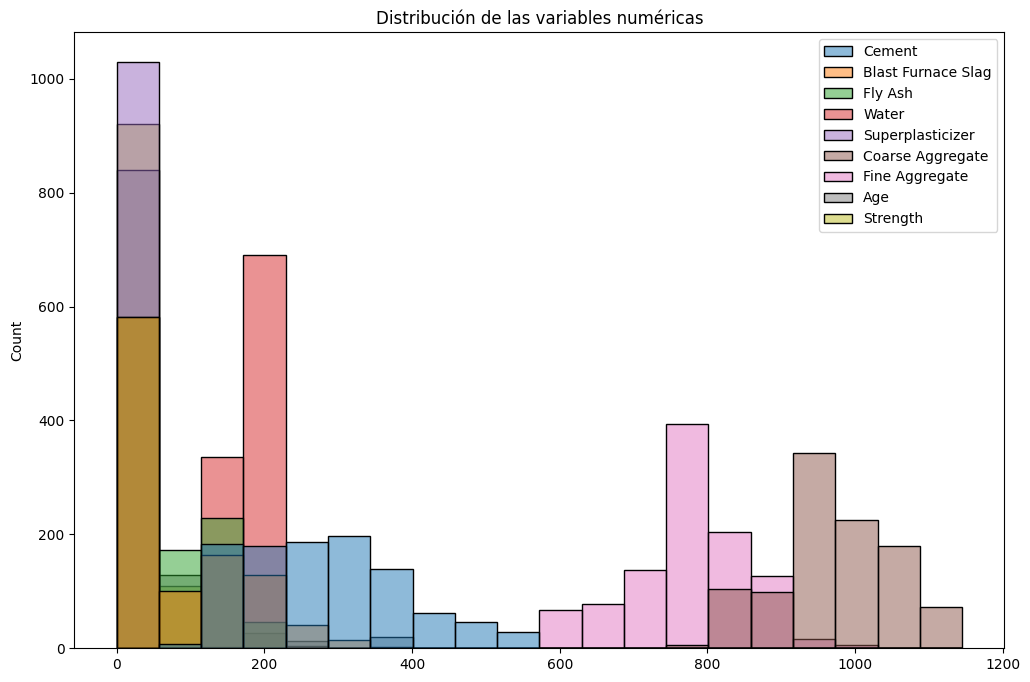

In [7]:
# Análisis de la distribución de las variables numéricas
print("\nAnálisis de la distribución de las variables numéricas:")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, bins=20)
plt.title('Distribución de las variables numéricas')
plt.show()


Exploración de la relación entre las variables:


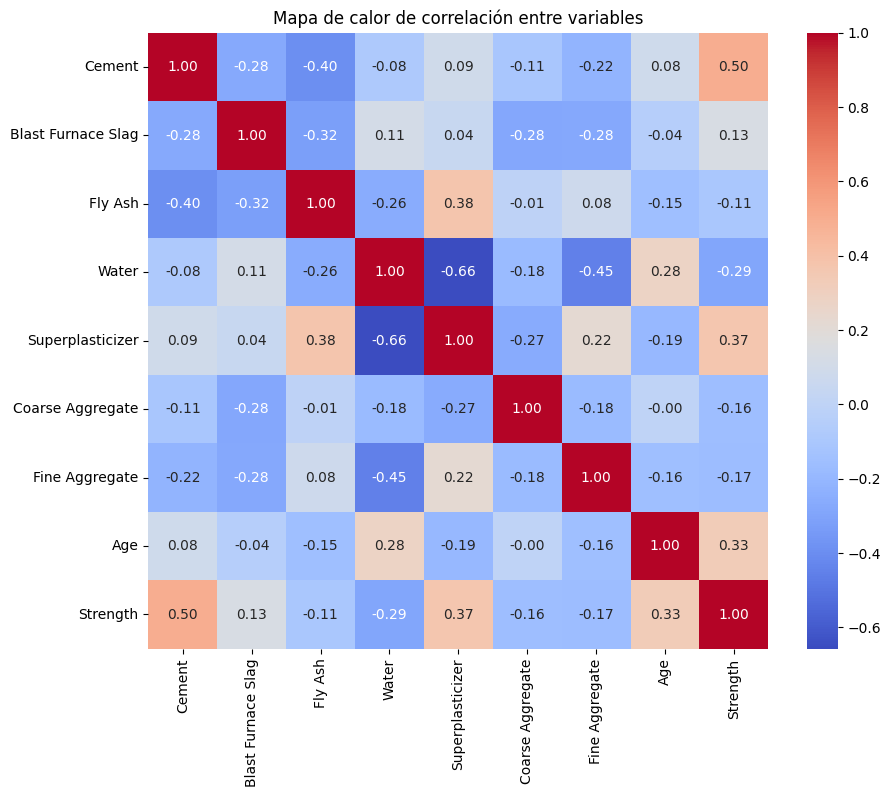

In [8]:
# Exploración de la relación entre las variables
print("\nExploración de la relación entre las variables:")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables')
plt.show()

Perspectivas de la matriz de correlación:

Strength y Cement: la correlación es 0.50, que es una correlación positiva moderada. Esto indica que a medida que aumenta la cantidad de cemento, la resistencia a la compresión del hormigón tiende a aumentar también.

Agua y superplastificante: existe una fuerte correlación negativa de -0,66. Esto sugiere que cuanto más superplastificante se utilice, menos agua se necesitará. Los superplastificantes se utilizan para mejorar la trabajabilidad del hormigón, permitiendo una reducción del contenido de agua sin reducir la fluidez.

Fly Ash y superplastificante: Tienen una correlación de 0.38, una correlación positiva moderada, lo que implica que las cantidades de cenizas volantes y superplastificante tienden a aumentar juntas. Las cenizas volantes pueden mejorar la trabajabilidad y reducir el contenido de agua, razón por la cual se usan junto con superplastificantes.

Fine Aggregate y Water: este par tiene una correlación de -0.45, lo que indica una correlación negativa moderada. Implica que un aumento en la cantidad de agregado fino puede estar asociado con una disminución en el contenido de agua.

Age y Strength: Con una correlación de 0.33, indica una relación positiva, aunque no muy fuerte, lo que sugiere que a medida que el concreto envejece, su resistencia a la compresión tiende a aumentar, lo cual se espera a medida que el concreto gana resistencia con el tiempo.

Blast Furnace Slag y Fly Ash: Existe una correlación negativa de -0.32, lo que podría indicar que en mezclas donde se utiliza escoria de alto horno hay menos cenizas volantes presentes, y viceversa.

Water y Cement: la correlación es -0.08, que es una correlación negativa muy débil, lo que sugiere que no existe una relación significativa entre las cantidades de agua y cemento utilizadas en la mezcla de concreto.


Identificación y manejo de outliers:


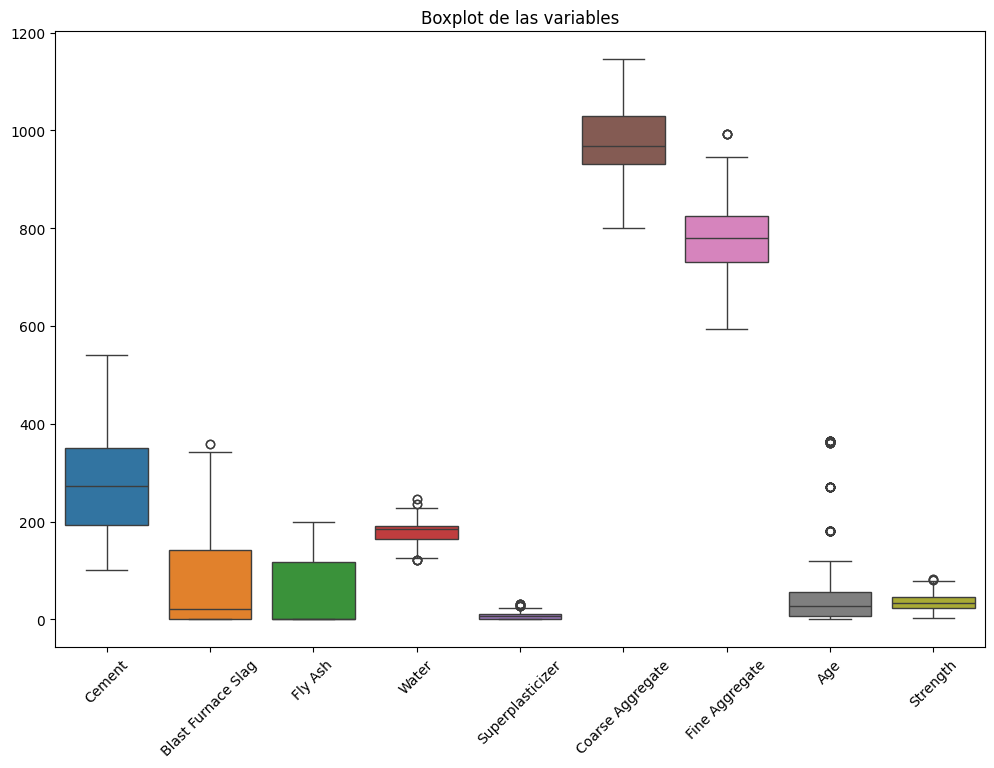

In [9]:
# Identificación y manejo de outliers
print("\nIdentificación y manejo de outliers:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot de las variables')
plt.xticks(rotation=45)
plt.show()

- Cement, Fly Ash y Coarse Aggregate no tienen valores atípicos.
- Blast Furnace Slag y Fine Aggregate tienen solo un valor atípico donde Blast Furnace Slag tiene desviación en el segundo pico.
- Age tiene muchos valores atípicos con un valor medio bajo.
- Water, Strength y Superplasticizer tienen multiples valores atípicos.


Análisis de la relación entre la edad del hormigón y la resistencia a la compresión:


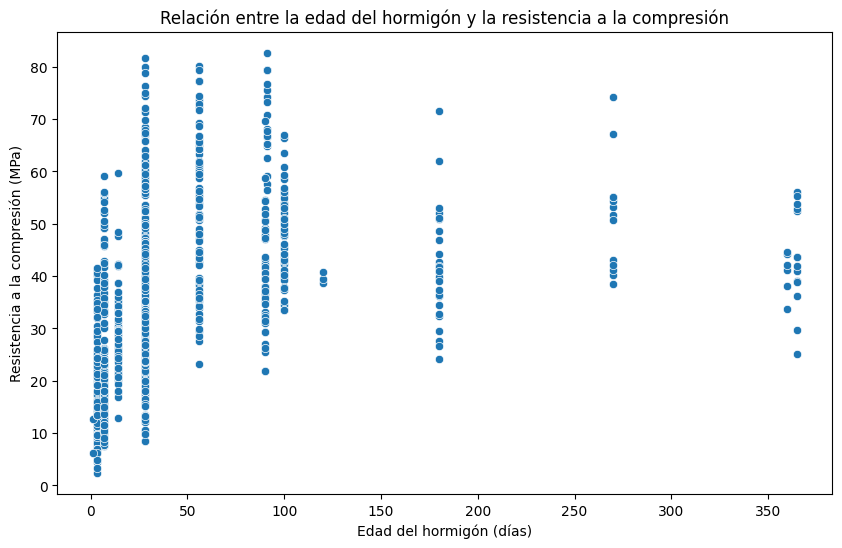

In [10]:
# Análisis de la relación entre la edad del hormigón y la resistencia a la compresión
print("\nAnálisis de la relación entre la edad del hormigón y la resistencia a la compresión:")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Strength')
plt.title('Relación entre la edad del hormigón y la resistencia a la compresión')
plt.xlabel('Edad del hormigón (días)')
plt.ylabel('Resistencia a la compresión (MPa)')
plt.show()


In [11]:
# Calcular la correlación entre la edad del hormigón y la resistencia a la compresión
correlation = df['Age'].corr(df['Strength'])

print("La correlación entre la edad del hormigón y la resistencia a la compresión es:", correlation)


La correlación entre la edad del hormigón y la resistencia a la compresión es: 0.3288730007799875


 Este valor positivo sugiere que existe una correlación positiva moderada entre la edad del hormigón y la resistencia a la compresión. En otras palabras, a medida que la edad del hormigón aumenta, es probable que la resistencia a la compresión también aumente, aunque esta relación no es extremadamente fuerte.


Análisis de la relación entre la cantidad de agua en la mezcla y la resistencia a la compresión:


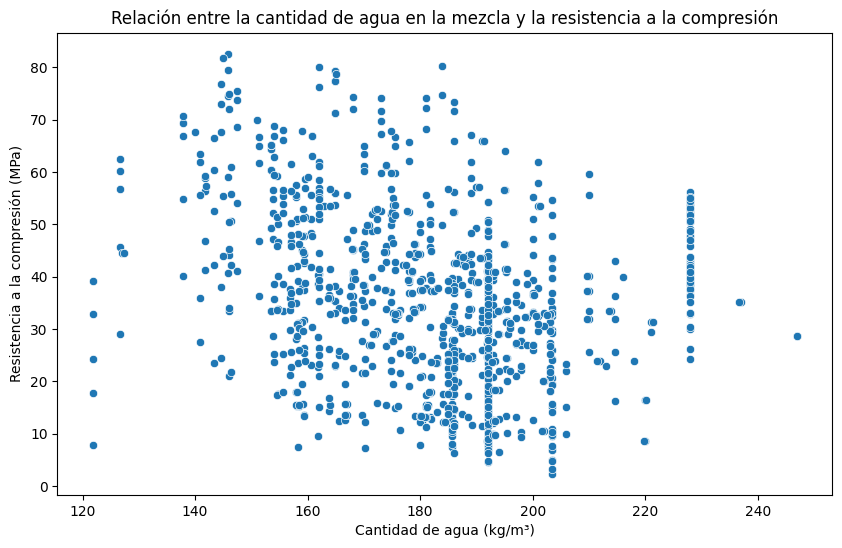

In [13]:
# Análisis de la relación entre la cantidad de agua en la mezcla y la resistencia a la compresión
print("\nAnálisis de la relación entre la cantidad de agua en la mezcla y la resistencia a la compresión:")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Water', y='Strength')
plt.title('Relación entre la cantidad de agua en la mezcla y la resistencia a la compresión')
plt.xlabel('Cantidad de agua (kg/m³)')
plt.ylabel('Resistencia a la compresión (MPa)')
plt.show()



Visualización de la distribución de la resistencia a la compresión:


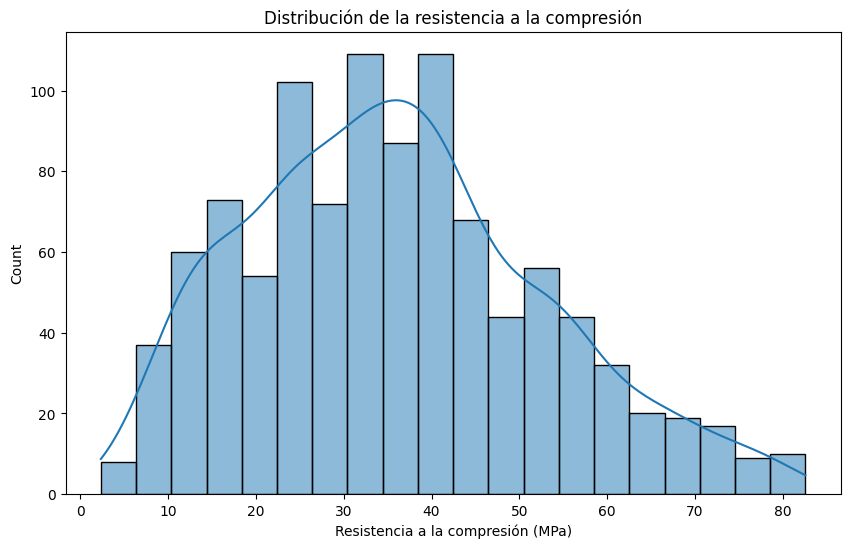

In [14]:
# Visualización de la distribución de la resistencia a la compresión
print("\nVisualización de la distribución de la resistencia a la compresión:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Strength'], bins=20, kde=True)
plt.title('Distribución de la resistencia a la compresión')
plt.xlabel('Resistencia a la compresión (MPa)')
plt.show()


In [15]:
# Resumen conclusiones
print("\nResumen de hallazgos y conclusiones:")
print("El análisis exploratorio revela varias tendencias y relaciones en el conjunto de datos:")
print("- La resistencia a la compresión parece aumentar con la cantidad de cemento y disminuir con la cantidad de agua en la mezcla.")
print("- La edad del hormigón también parece tener una influencia en la resistencia a la compresión, pero la relación no es lineal.")
print("- Se observan algunas diferencias en la resistencia a la compresión en función de los diferentes componentes del hormigón.")
print("- La distribución de la resistencia a la compresión parece seguir una distribución normal, con una ligera asimetría positiva.")


Resumen de hallazgos y conclusiones:
El análisis exploratorio revela varias tendencias y relaciones en el conjunto de datos:
- La resistencia a la compresión parece aumentar con la cantidad de cemento y disminuir con la cantidad de agua en la mezcla.
- La edad del hormigón también parece tener una influencia en la resistencia a la compresión, pero la relación no es lineal.
- Se observan algunas diferencias en la resistencia a la compresión en función de los diferentes componentes del hormigón.
- La distribución de la resistencia a la compresión parece seguir una distribución normal, con una ligera asimetría positiva.


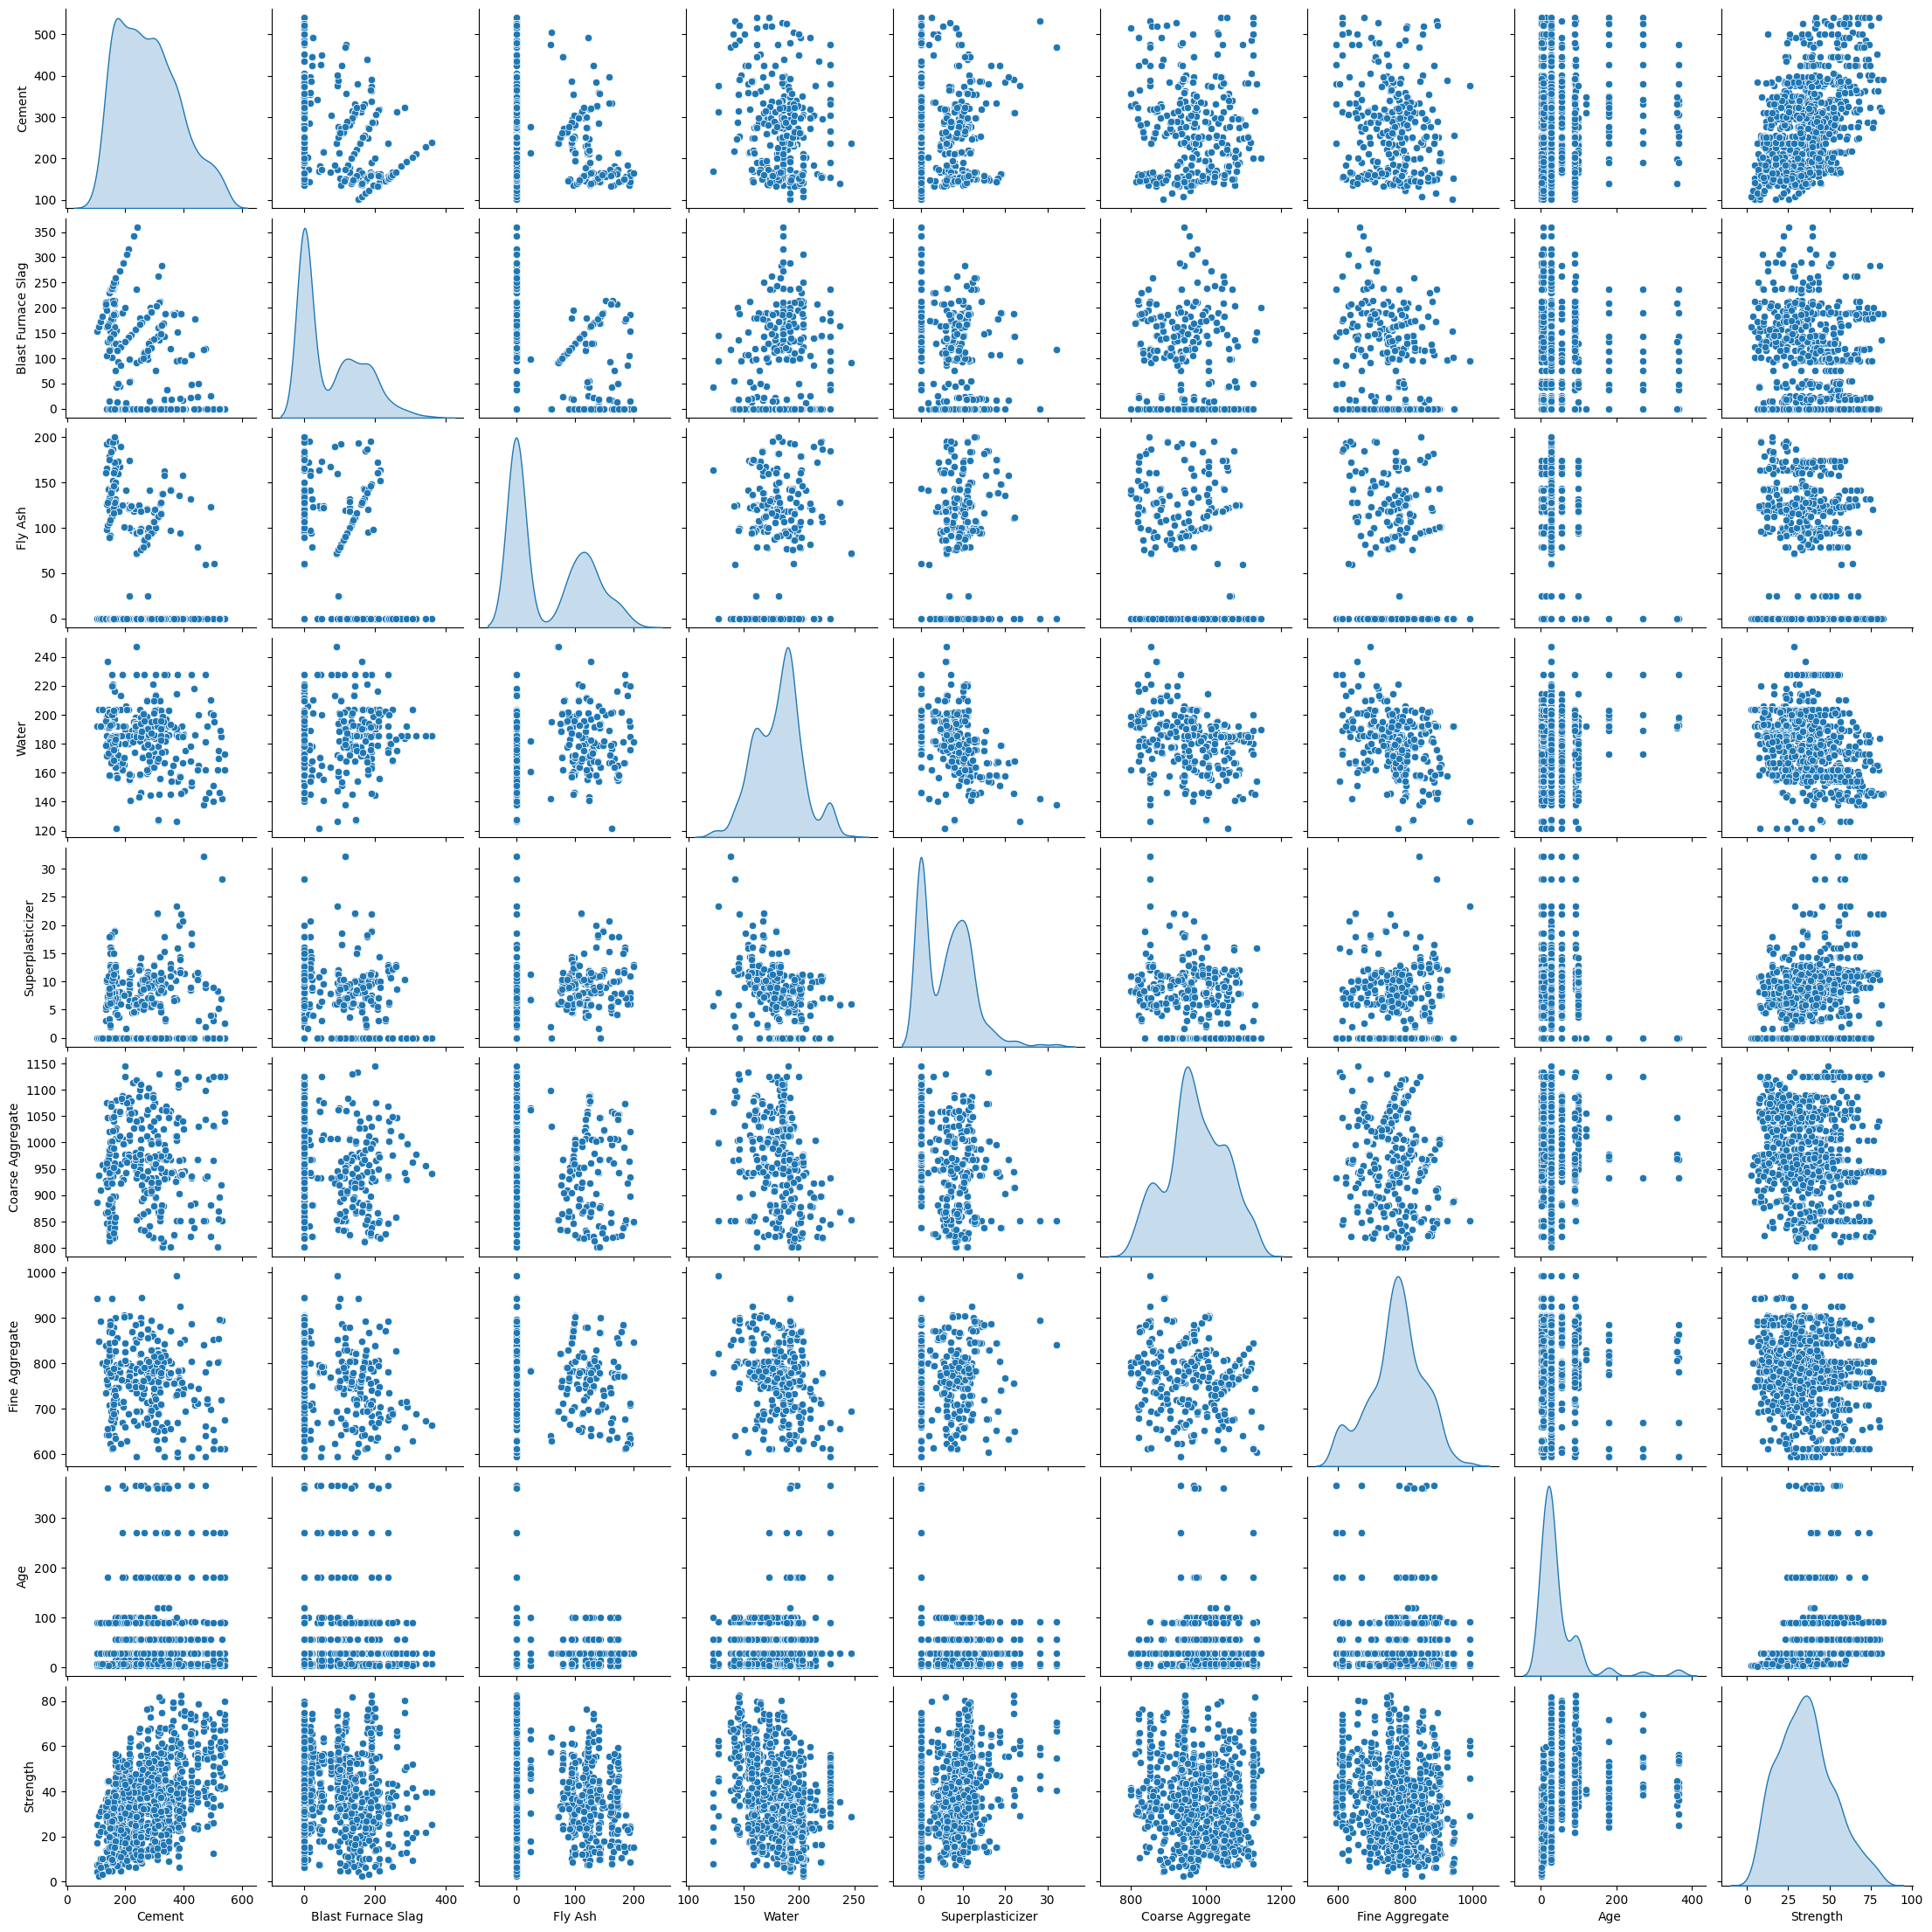

In [16]:
sns.pairplot(df, diag_kind="kde")

- La misma relación que podemos ver aquí entre Strength y Cement.
- Age y Strength tambien tienen una relación ligeramente lineal.
- Water y Strength tienen una ligera relación lineal inversa.

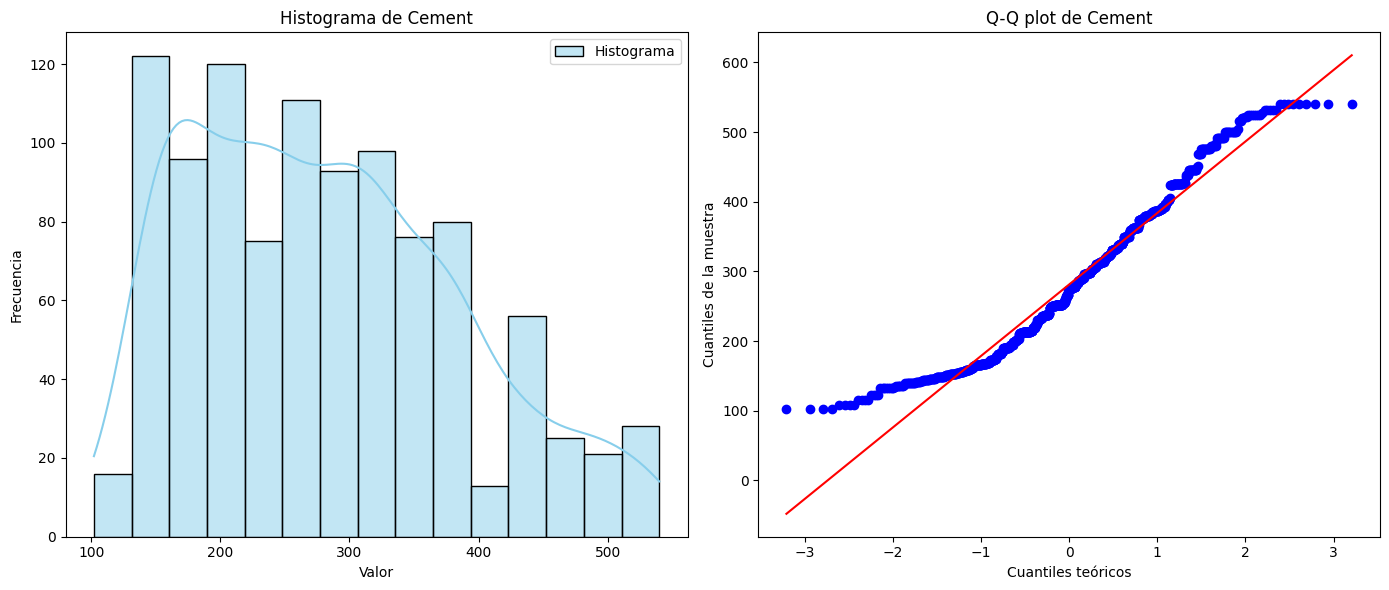

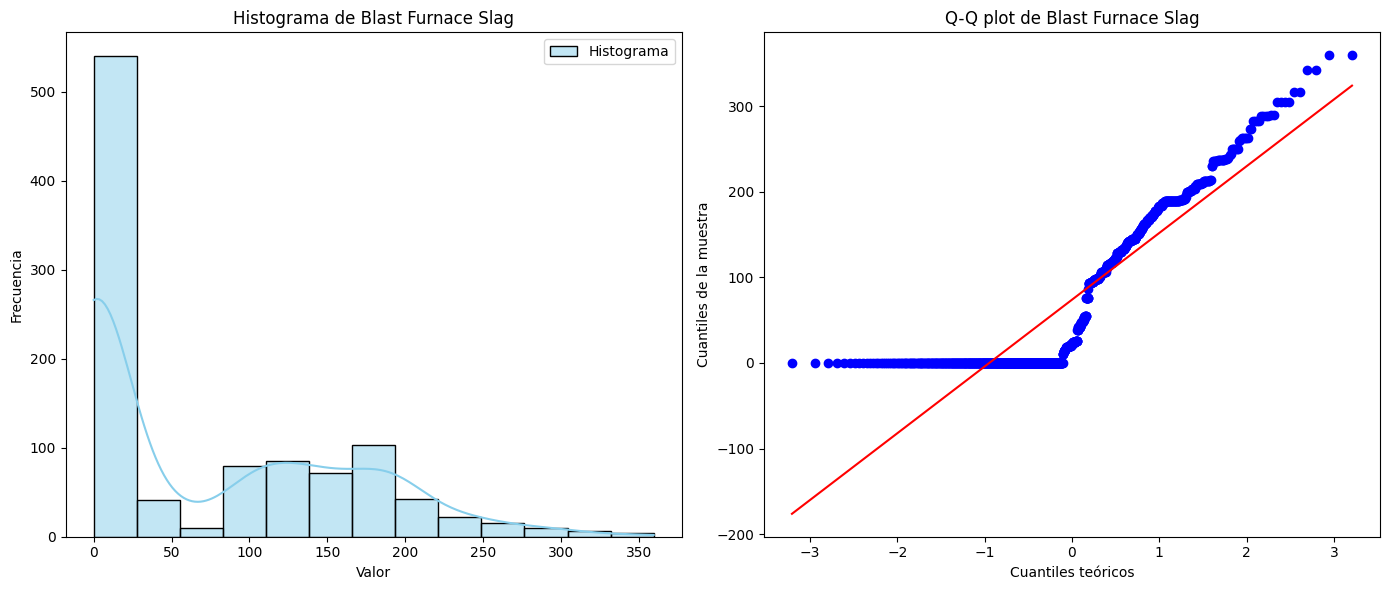

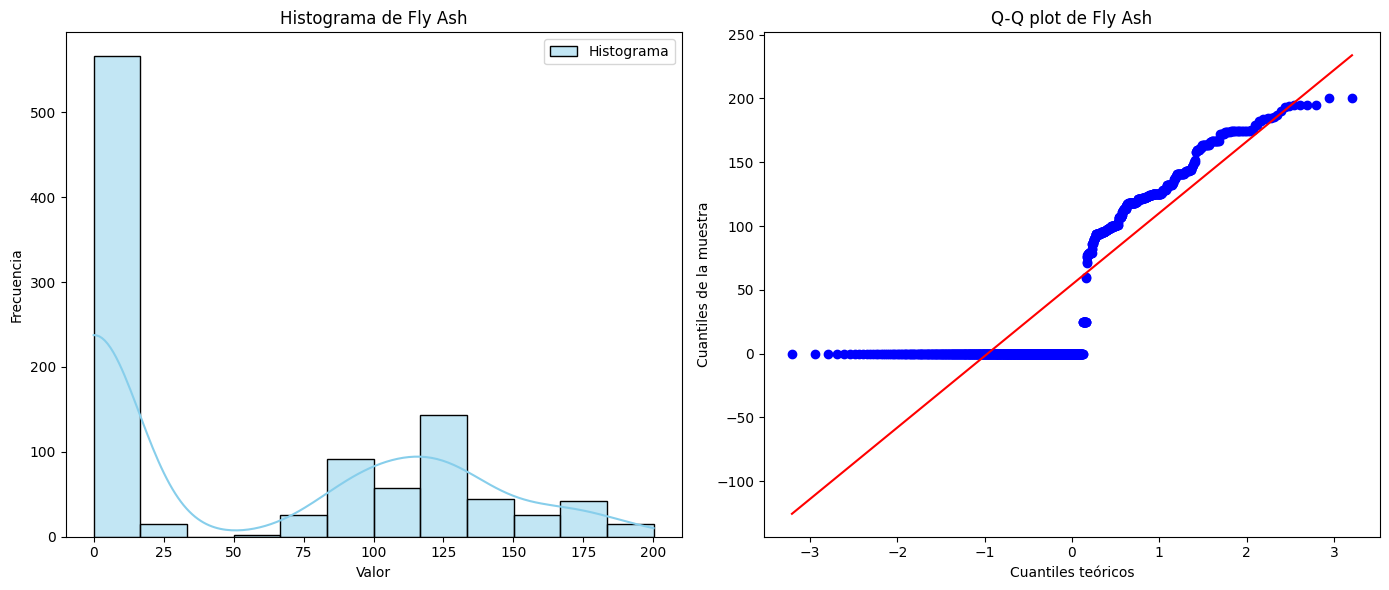

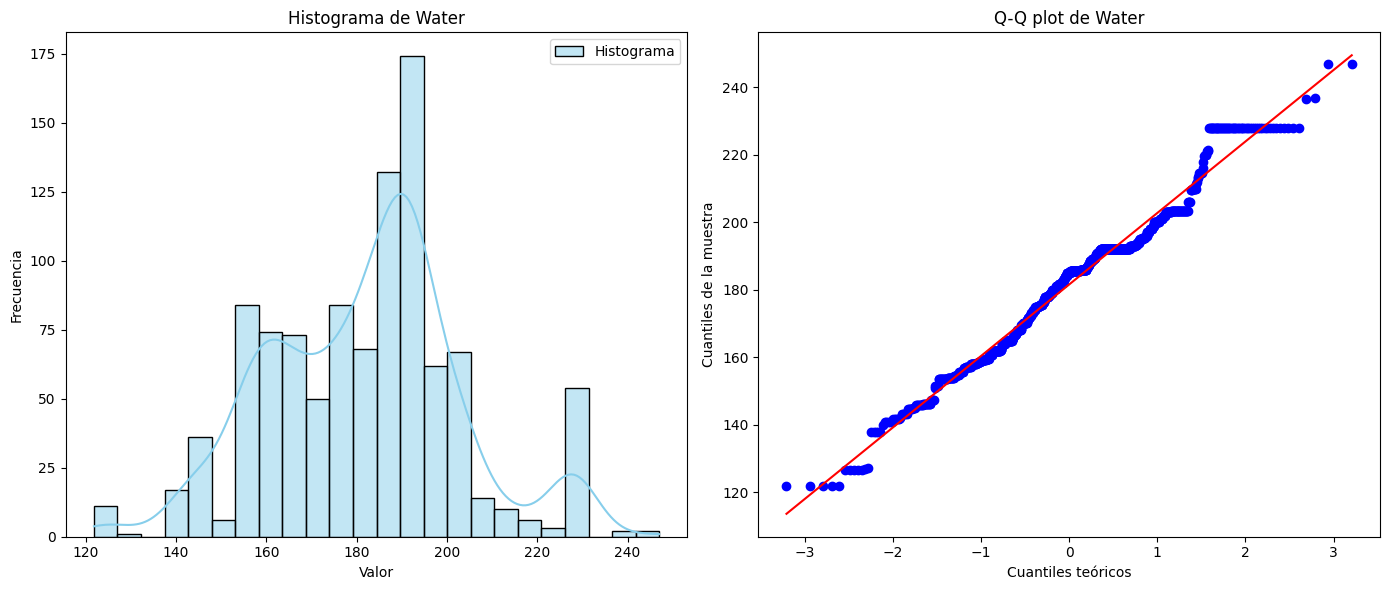

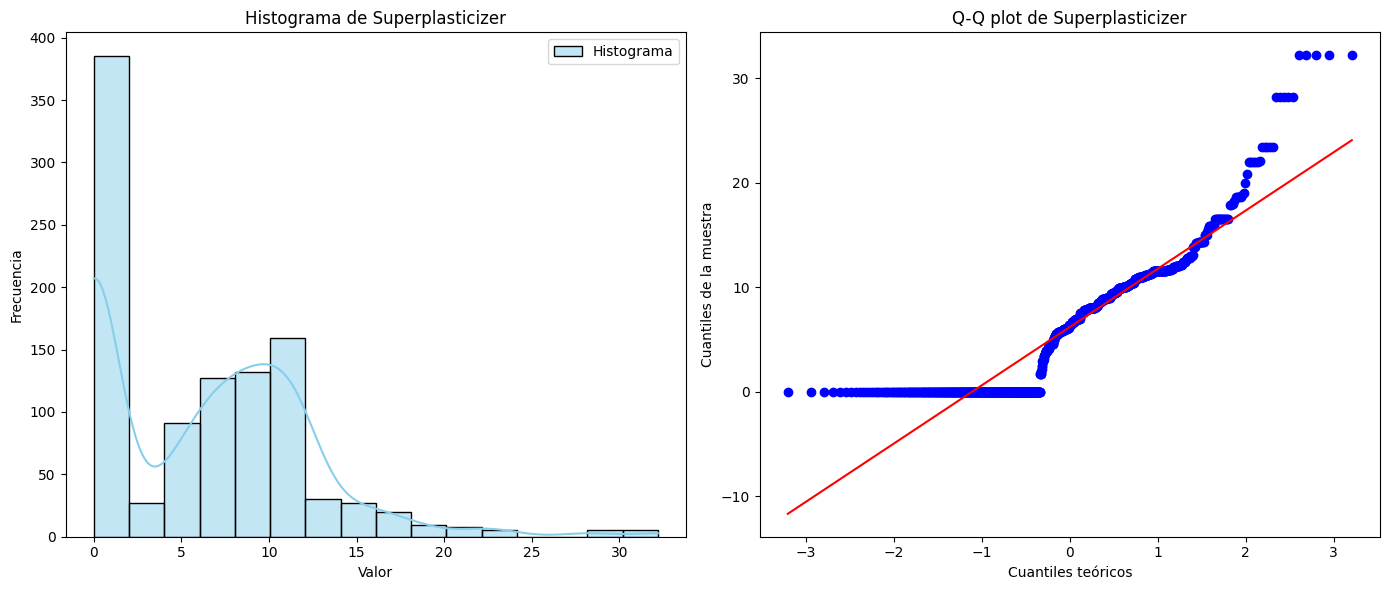

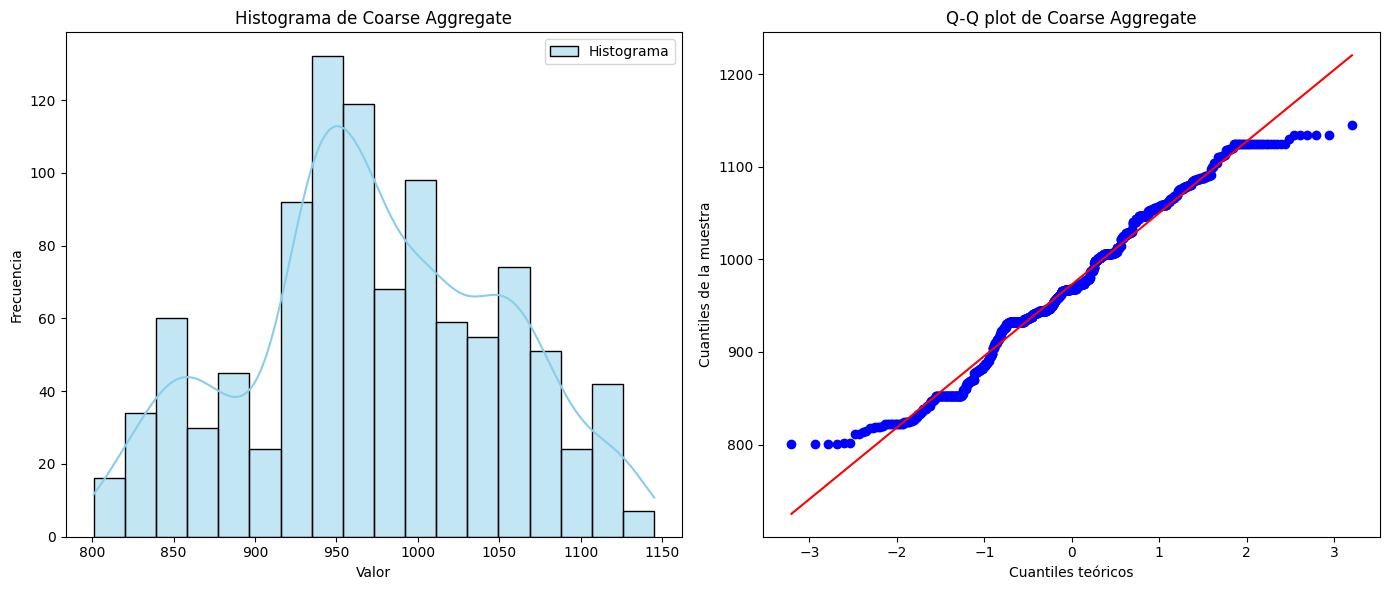

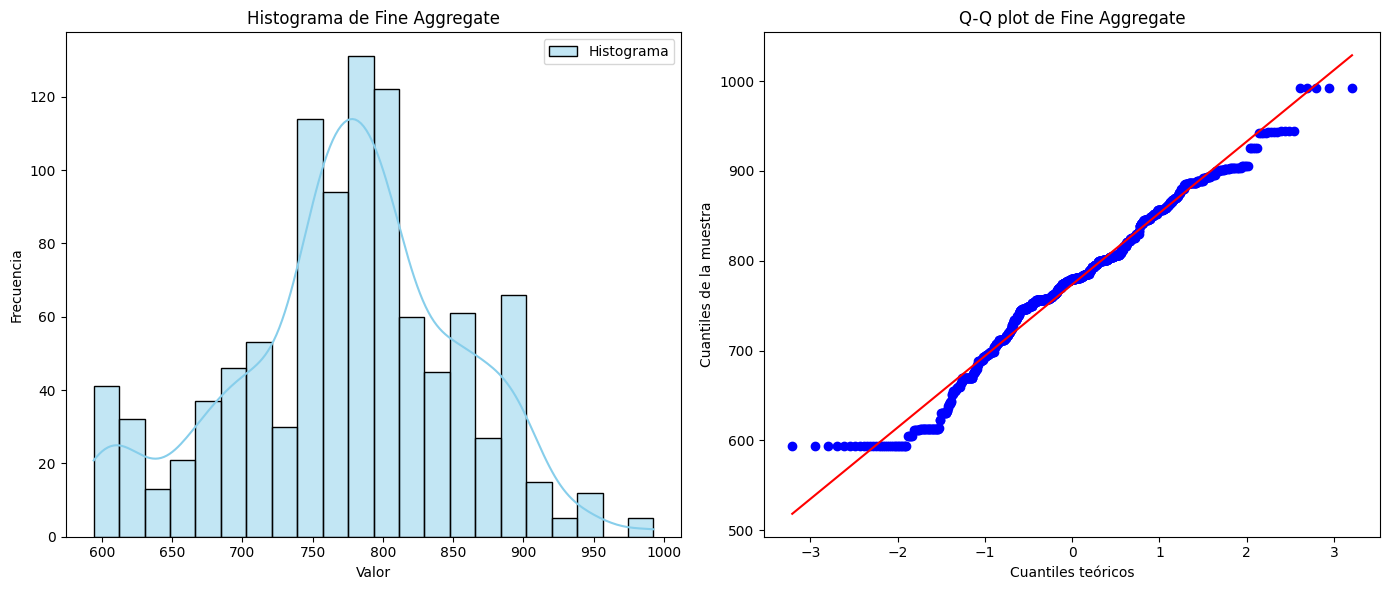

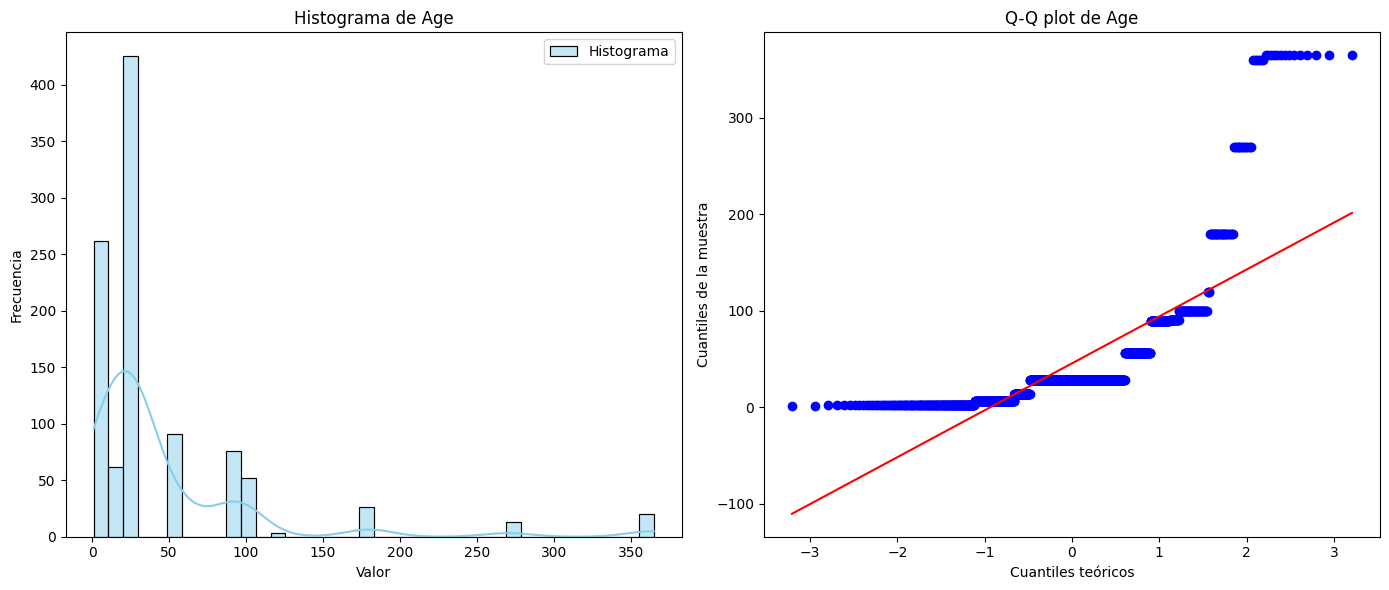

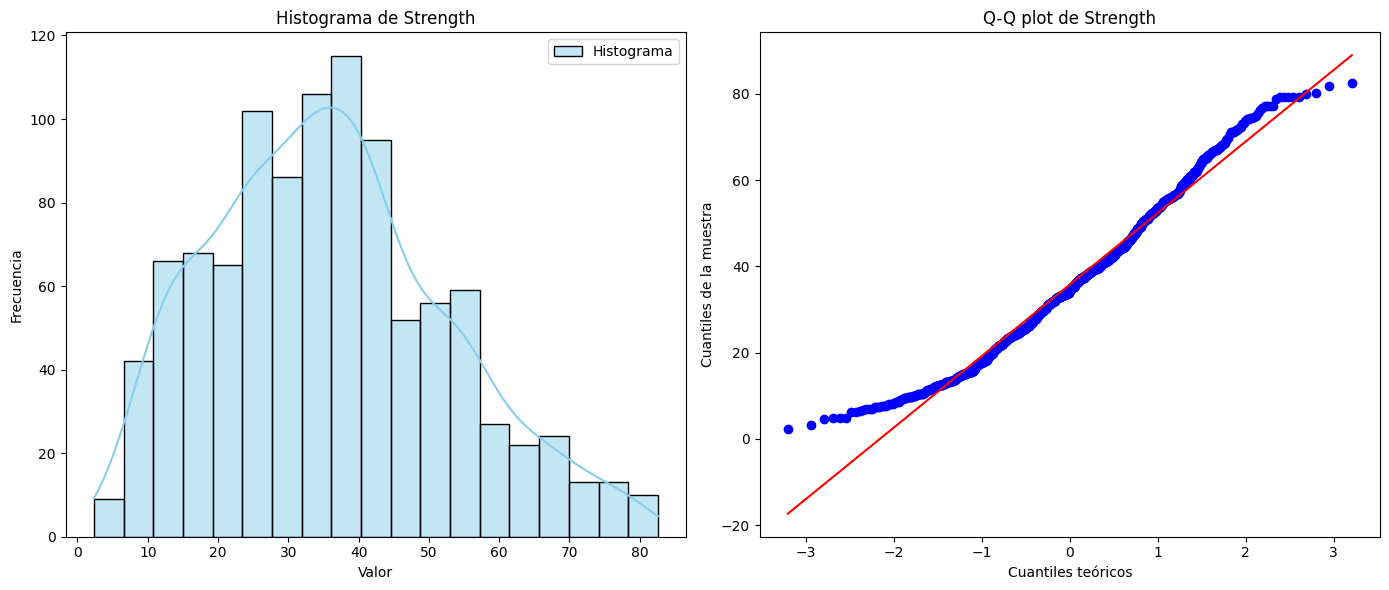

Resultados del test de Shapiro-Wilk:
             Variable      Stat       p-value  Normal (alpha=0.05)
0              Cement  0.958961  2.081700e-16                False
1  Blast Furnace Slag  0.812409  5.795510e-33                False
2             Fly Ash  0.761999  4.134698e-36                False
3               Water  0.980390  1.462977e-10                False
4    Superplasticizer  0.866031  9.064747e-29                False
5    Coarse Aggregate  0.982453  8.347135e-10                False
6      Fine Aggregate  0.980671  1.841960e-10                False
7                 Age  0.590706  7.718419e-44                False
8            Strength  0.979791  9.010083e-11                False

Variable: Cement
Estadístico de prueba (W): 0.9589606405907329
p-value: 2.0816997308487217e-16
Se rechaza la hipótesis nula (H0): Los datos no se distribuyen normalmente (p-value <= 0.05)

Variable: Blast Furnace Slag
Estadístico de prueba (W): 0.8124091681661155
p-value: 5.795509854833019e-

In [17]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener una lista de todas las columnas en tus datos, excluyendo las columnas no numéricas si es necesario
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear una lista vacía para almacenar los resultados de los tests de Shapiro-Wilk
shapiro_results = []

# Iterar sobre todas las variables numéricas y realizar el test de Shapiro-Wilk y Q-Q plot
for col in numeric_columns:
    plt.figure(figsize=(14, 6))
    
    # Test de Shapiro-Wilk
    stat, p_value = stats.shapiro(df[col])
    normal = p_value > 0.05  # Verificar si los datos se distribuyen normalmente
    shapiro_results.append({'Variable': col, 'Stat': stat, 'p-value': p_value, 'Normal (alpha=0.05)': normal})
    
    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue', label='Histograma')
    plt.title('Histograma de {}'.format(col))
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title('Q-Q plot de {}'.format(col))
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de la muestra')
    
    plt.tight_layout()
    plt.show()

# Convertir la lista de resultados en un DataFrame
shapiro_results_df = pd.DataFrame(shapiro_results)

# Mostrar los resultados del test de Shapiro-Wilk
print("Resultados del test de Shapiro-Wilk:")
print(shapiro_results_df)

# Interpretación de los resultados del test de Shapiro-Wilk
for index, row in shapiro_results_df.iterrows():
    print("\nVariable:", row['Variable'])
    print("Estadístico de prueba (W):", row['Stat'])
    print("p-value:", row['p-value'])
    if row['Normal (alpha=0.05)']:
        print("No se rechaza la hipótesis nula (H0): Los datos se distribuyen normalmente (p-value > 0.05)")
    else:
        print("Se rechaza la hipótesis nula (H0): Los datos no se distribuyen normalmente (p-value <= 0.05)")


## La continuacion de aca hacia abajo es en caso de que escojamos ciertas variables 

### Division de variables

Vamos a proceder a implementar algunos de los pasos sugeridos utilizando las cuatro variables seleccionadas (Age, Cement, Water y Blast Furnace Slag) para predecir la resistencia a la compresión del hormigón.

In [23]:
# Identificar el cuartil
q1, q3 = np.percentile(df['Age'], [25, 75])
# Calcular el rango intercuartil
iqr = q3 - q1
# Calcular los límites inferior y superior
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Elimina los valores atípicos
clean_data = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
 
q1, q3 = np.percentile(clean_data['Blast Furnace Slag'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
clean_data = clean_data[(clean_data['Blast Furnace Slag'] >= lower_bound) & (clean_data['Blast Furnace Slag'] <= upper_bound)]
 
q1, q3 = np.percentile(clean_data['Water'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
clean_data = clean_data[(clean_data['Water'] >= lower_bound) & (clean_data['Water'] <= upper_bound)]
 

q1, q3 = np.percentile(clean_data['Superplasticizer'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
clean_data = clean_data[(clean_data['Superplasticizer'] >= lower_bound) & (clean_data['Superplasticizer'] <= upper_bound)]

df = clean_data 

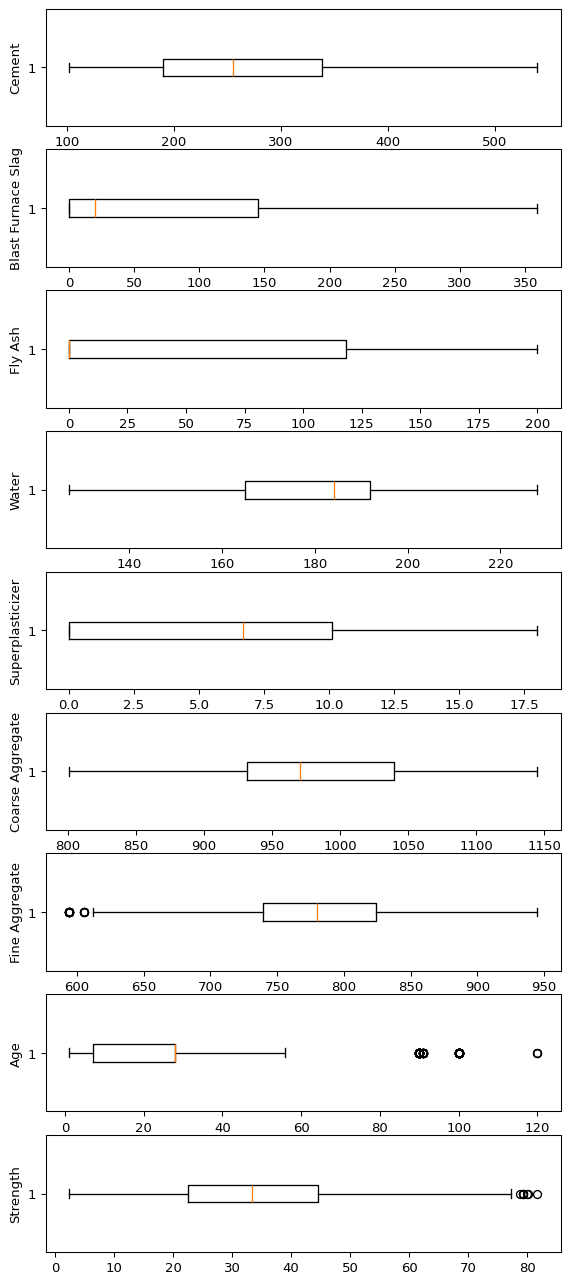

In [24]:
# Diagramas de caja actualizados
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

Podemos ver que nuestro conjunto de datos se ve mejor ahora en términos de valores atípicos.

Normalización

- MinMaxScaler escala los datos para que cada característica esté en el rango [0, 1].
- Funciona bien cuando las entidades tienen diferentes escalas y el algoritmo que se utiliza es sensible a la escala de las entidades, como k vecinos más cercanos o redes neuronales.
- Cambie la escala de sus datos usando scikit-learn usando MinMaxScaler.

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Inicializando el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Aprender los parámetros estadísticos para cada columna de datos y transformar los datos.
rescaledX = scaler.fit_transform(df)

# Convertir los datos transformados en un DataFrame
df_rescaled = pd.DataFrame(rescaledX, columns=df.columns)

# Imprime el DataFrame transformado
df_rescaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,1.000000,0.000000,0.0,0.346535,0.138889,0.694767,0.233618,0.226891,0.977839
1,1.000000,0.000000,0.0,0.346535,0.138889,0.738372,0.233618,0.226891,0.749937
2,0.374429,0.317195,0.0,1.000000,0.000000,0.380814,0.216524,0.747899,0.562831
3,0.634703,0.264329,0.0,1.000000,0.000000,0.380814,0.000000,0.226891,0.429615
4,0.374429,0.317195,0.0,1.000000,0.000000,0.380814,0.216524,0.226891,0.547973


Estandarización

- La estandarización es una técnica útil para transformar atributos con una distribución gaussiana y diferentes medias y desviaciones estándar a una distribución gaussiana estándar con una media de 0 y una desviación estándar de 1.
- Podemos estandarizar datos usando scikit-learn con la clase StandardScaler.
- Funciona bien cuando las características tienen una distribución normal o cuando el algoritmo que se utiliza no es sensible a la escala de las características.

In [28]:
scaler = StandardScaler().fit(df_rescaled)
rescaledX = scaler.transform(df_rescaled)

# Convertir los datos estandarizados en un DataFrame
df_standardized = pd.DataFrame(rescaledX, columns=df_rescaled.columns)
df = df_standardized

# Imprime el DataFrame estandarizado
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.609938,-0.842185,-0.898145,-1.019657,-0.691752,0.824438,-1.334757,-0.154124,2.719509
1,2.609938,-0.842185,-0.898145,-1.019657,-0.691752,1.017127,-1.334757,-0.154124,1.631426
2,-0.086896,0.461433,-0.898145,2.528916,-1.186545,-0.562925,-1.414378,2.014450,0.738116
3,1.035144,0.244164,-0.898145,2.528916,-1.186545,-0.562925,-2.422906,-0.154124,0.102099
4,-0.086896,0.461433,-0.898145,2.528916,-1.186545,-0.562925,-1.414378,-0.154124,0.667180


# EXPLORATORY DATA ANALYSIS (EDA)

In [29]:
# Restablecer el índice del DataFrame
df.reset_index(drop=True, inplace=True)

# Imprime el DataFrame actualizado con índices redefinidos
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.609938,-0.842185,-0.898145,-1.019657,-0.691752,0.824438,-1.334757,-0.154124,2.719509
1,2.609938,-0.842185,-0.898145,-1.019657,-0.691752,1.017127,-1.334757,-0.154124,1.631426
2,-0.086896,0.461433,-0.898145,2.528916,-1.186545,-0.562925,-1.414378,2.014450,0.738116
3,1.035144,0.244164,-0.898145,2.528916,-1.186545,-0.562925,-2.422906,-0.154124,0.102099
4,-0.086896,0.461433,-0.898145,2.528916,-1.186545,-0.562925,-1.414378,-0.154124,0.667180


In [31]:
# correlación
corr = df.corr()
corr['Strength'].sort_values(ascending = False)

Strength              1.000000
Age                   0.518614
Cement                0.471095
Superplasticizer      0.382221
Blast Furnace Slag    0.136278
Fly Ash              -0.054255
Coarse Aggregate     -0.154240
Fine Aggregate       -0.164148
Water                -0.356515
Name: Strength, dtype: float64

Las covariables edad, cemento y superplastificante se correlacionan moderada y positivamente con la resistencia_compresiva_del_hormigón, mientras que la característica agua muestra una correlación moderada y negativa con esta última. En cuanto a las otras características, están débilmente correlacionadas con concrete_compressed_strength y probablemente se eliminarán.


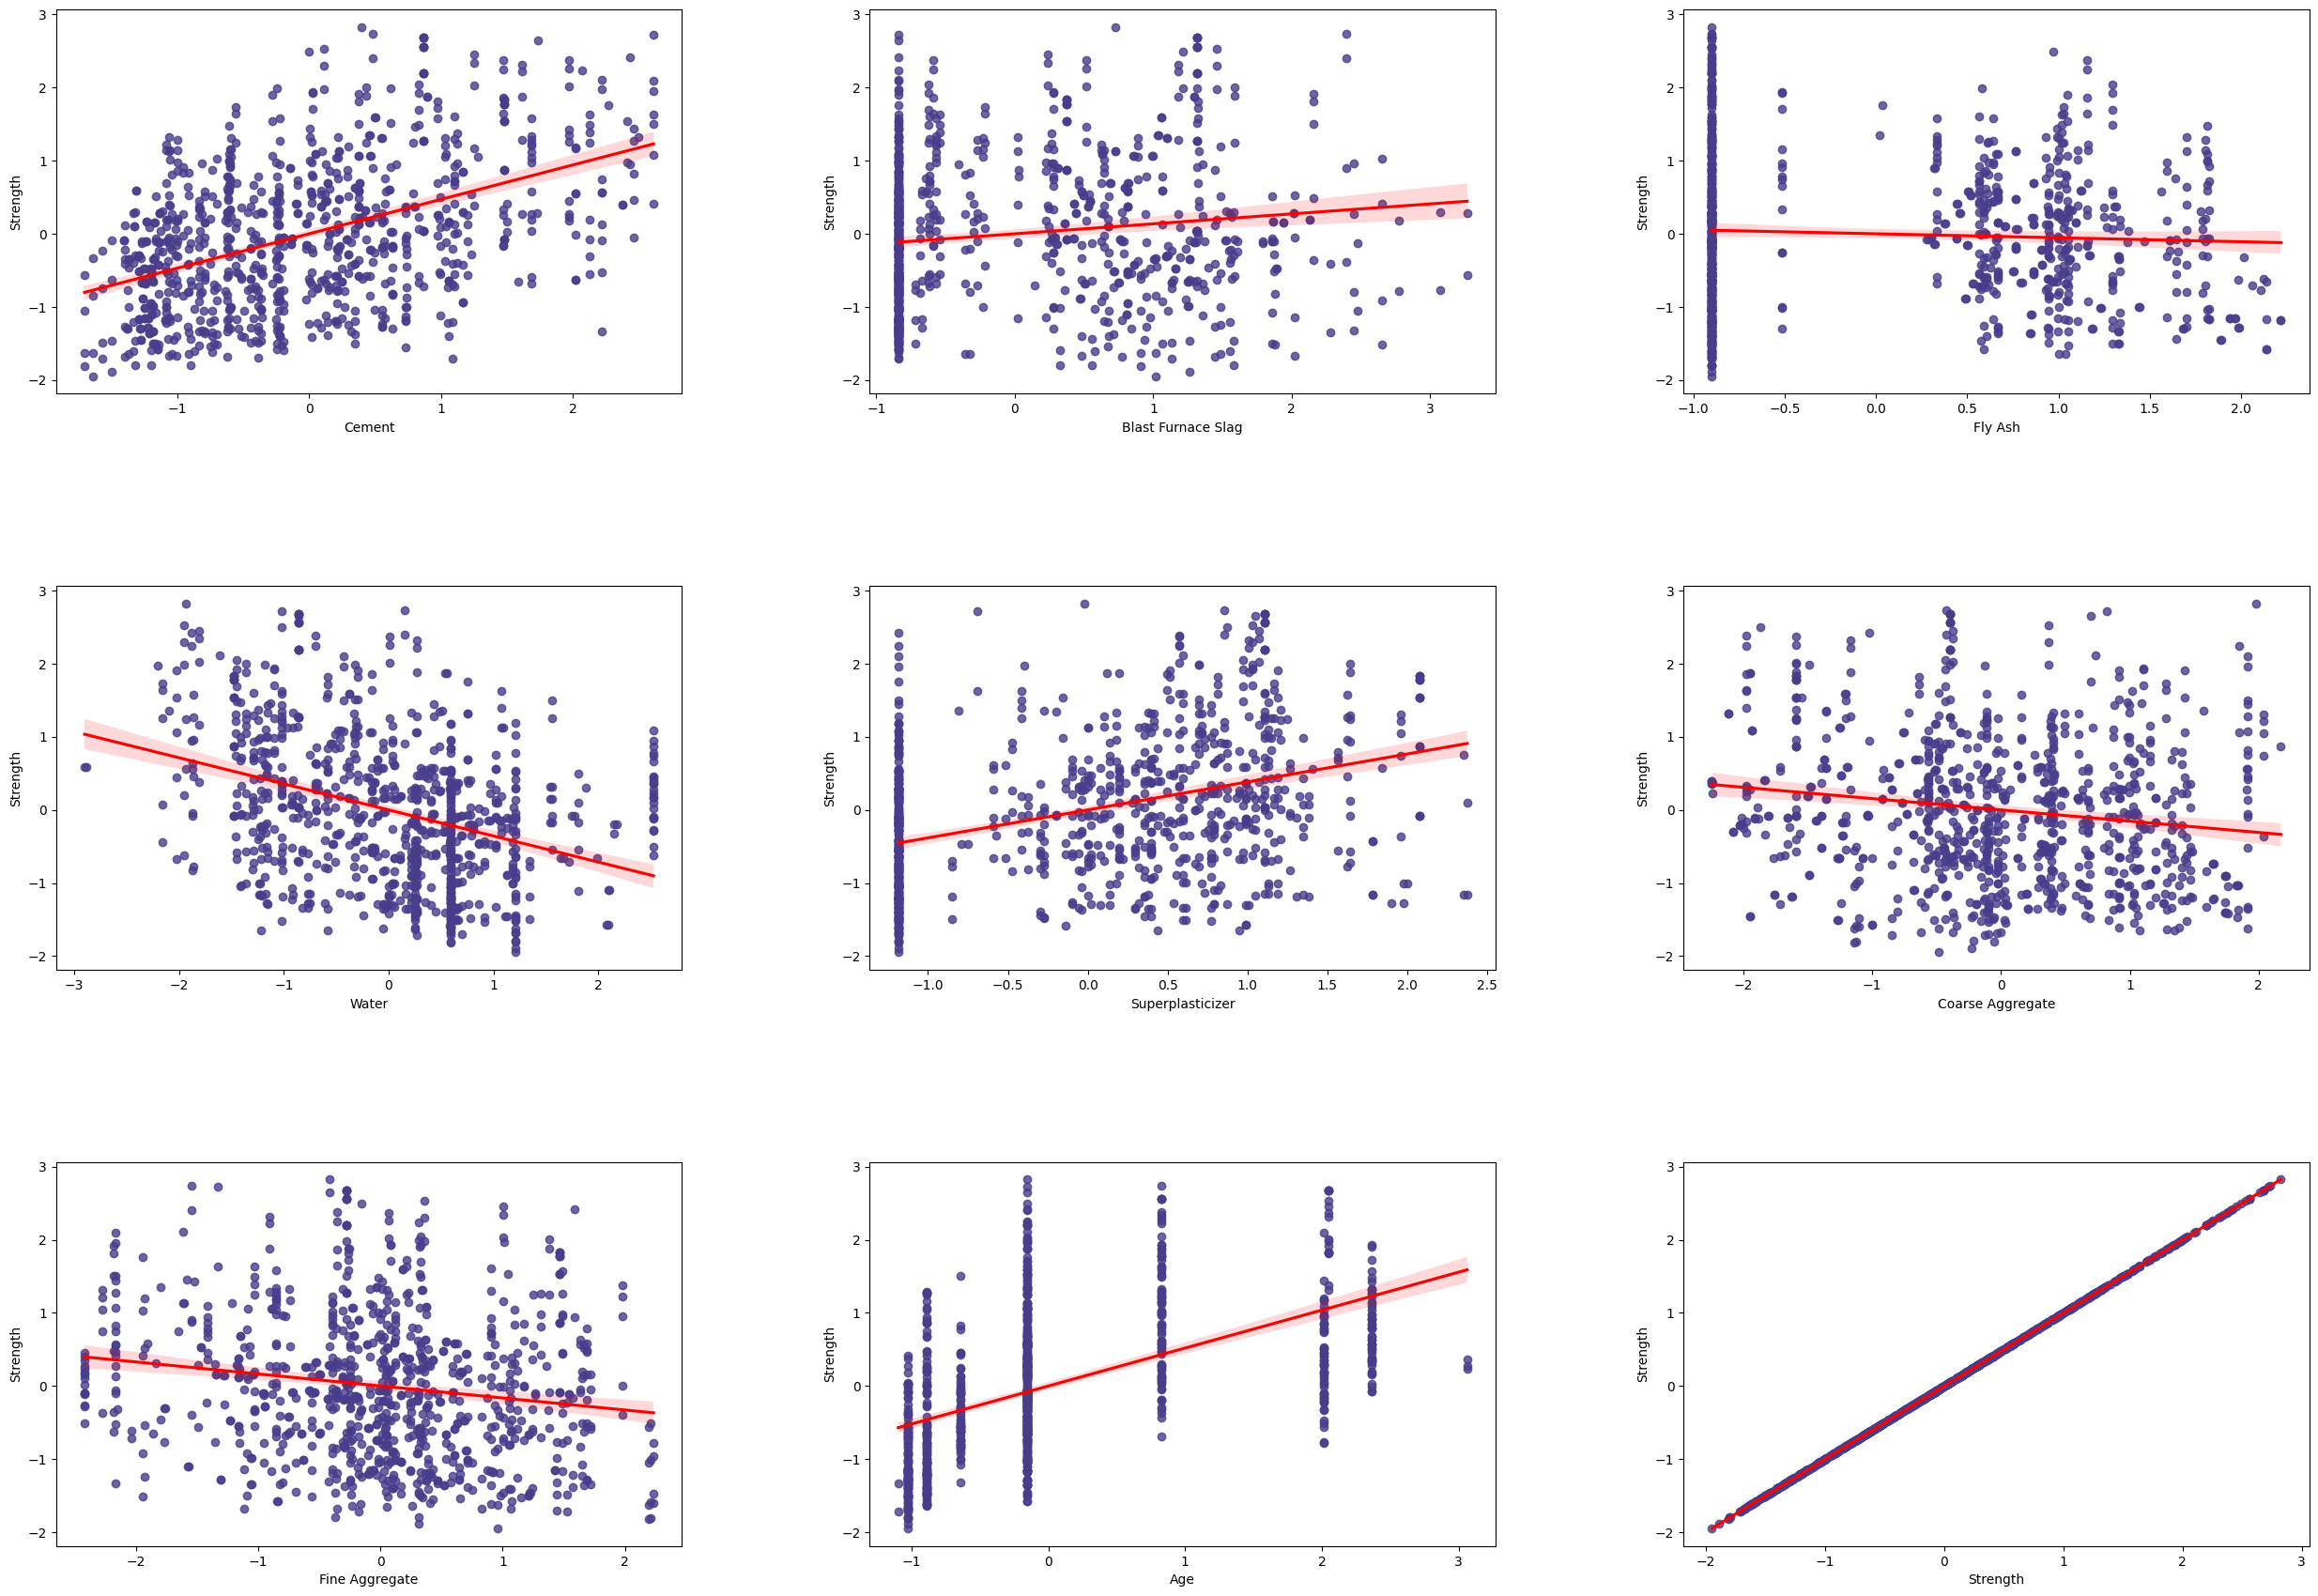

In [32]:
# Crea la figura con un tamaño de 30 pulgadas por 50 pulgadas.
fig = plt.figure(figsize=(30, 50))

# Ajustar el espacio entre subtramas
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.9, wspace=0.3, hspace=0.5)

# Iterar sobre las columnas del DataFrame
for i, col in enumerate(df.columns):
    # Create a new subplot
    plt.subplot(15, 3, i + 1)
    
    # Crear un gráfico de regresión en el subtrama actual
    # con x como columna actual e y como "concrete_compressed_strength"
    # usando datos del DataFrame df
    # Personaliza los puntos de dispersión para que tengan un color 
    # y la línea de regresión tendrá un color "rojo"
    sns.regplot(x=col, y="Strength", data=df, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

# Display the figure
plt.show()

Podemos ver claramente que existe una asociación lineal entre las covariables y nuestra variable de respuesta. Además, el diagrama de dispersión revela que hay demasiada redundancia en la observación de las características ceniza volante y superplastificante. Se denominan variables cuasiconstantes.
